In [1]:
%matplotlib inline
from real_fermi_model2 import *

In [2]:
states12 = csv_to_states_from_filename('states12_25.csv')
scores = RealFermi2.get_scores(states12)
scores -= scores[0]
e_num = 12

In [3]:
def calc_level_density(states: list[State]):
    """実際のエネルギー準位密度を計算"""
    dct = {}
    for state in states:
        if dct.get(state.score):
            dct[state.score] += 1
        else:
            dct[state.score] = 1
    scores = np.fromiter(dct.keys(), dtype=int)
    scores = scores - scores[0]  # 基底状態のエネルギー準位を0[ε]にする
    level_density = np.fromiter(dct.values(), dtype=int) # ヒストグラムの幅は１として考えればよいので、密度ではあるが何も割る必要がない
    return scores, level_density

# 正規方程式を解く
def solve_normal_equation(xs: NDArray, ys: NDArray):
    """
    Args:
        xs (NDArray[float])
        ys (NDArray[float])
    
    Returns:
        intercept (float): 切片
        slope (float): 傾き
    """
    x_ave = xs.mean()
    y_ave = ys.mean()
    cov = np.sum((xs - x_ave) * (ys - y_ave))
    var = np.sum((xs - x_ave)**2)
    slope = cov / var
    intercept = y_ave - x_ave * slope
    return intercept, slope

def calc_approx_level_density(states: list[State], rho_0: float, eps_0: float) -> NDArray[np.float64]:
    """近似したエネルギー準位密度を計算"""
    # 昇順にソート
    scores = np.sort(np.array(list({state.score for state in states})))
    scores = scores - scores[0]  # 基底状態のエネルギー準位を0[ε]にする
    return rho_0 * np.exp(scores/eps_0)

In [4]:
all_scores = np.array(sorted([state.score for state in states12]))
all_scores -= all_scores[0]

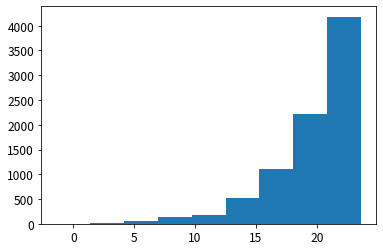

In [10]:
# hist, bins = np.histogram(all_scores, bins=10)
hist, bins = np.histogram(all_scores, bins=9)
plt.bar(bins[:-1], hist, width=np.diff(bins))
plt.show()

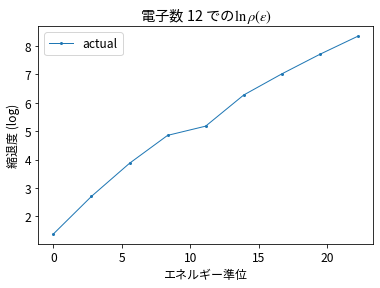

In [11]:
plt.plot(bins[:-1], np.log(hist), marker=".", linewidth=1, ms=4, label="actual")
plt.legend()
plt.xlabel("エネルギー準位")
plt.ylabel("縮退度 (log)")
plt.title(f"電子数 {e_num} での" + r"$\ln{\rho(\epsilon)}$")
plt.show()

## エネルギー準位が小さいときはexp()の形になってないので，フィッティングの際は取り除く

In [13]:
# a, b = solve_normal_equation(xs=bins[3:-2], ys=np.log(hist[3:-1])) # y = a + bx
# a, b = solve_normal_equation(xs=bins[4:-1], ys=np.log(hist[4:])) # y = a + bx
a, b = solve_normal_equation(xs=bins[5:-1], ys=np.log(hist[5:])) # y = a + bx
rho_0 = np.exp(a)
eps_0 = 1/b
# approx_level_density = calc_approx_level_density(states=states12, rho_0=rho_0, eps_0=eps_0)
print(f"rho_0 = {rho_0}\neps_0 = {eps_0}")

rho_0 = 17.31722238212412
eps_0 = 4.0308438067837855


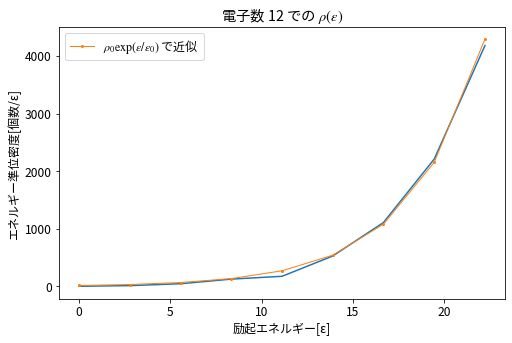

In [14]:
e_num = 12
plt.figure(figsize=(8, 5))
plt.plot(bins[:-1], hist)
plt.plot(bins[:-1], rho_0 * np.exp(bins[:-1]/eps_0), marker=".", linewidth=1, ms=4, label=r"$\rho_0\exp(\epsilon/\epsilon_0)$ で近似")
plt.legend()
plt.xlabel("励起エネルギー[ε]")
plt.ylabel("エネルギー準位密度[個数/ε]")
plt.title(fr"電子数 {e_num} での $\rho(\epsilon)$")
plt.show()

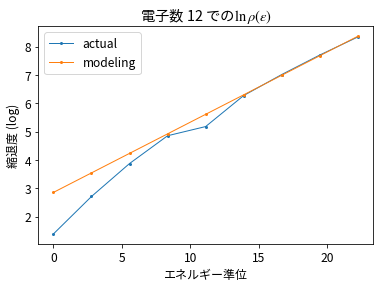

In [15]:
plt.plot(bins[:-1], np.log(hist), marker=".", linewidth=1, ms=4, label="actual")
plt.plot(bins[:-1], a + b * bins[:-1], marker=".", linewidth=1, ms=4, label="modeling")
plt.legend()
plt.xlabel("エネルギー準位")
plt.ylabel("縮退度 (log)")
plt.title(f"電子数 {e_num} での" + r"$\ln{\rho(\epsilon)}$")
plt.show()

# １電子遷移で解く

In [10]:
eV2eps = eps_0 / 150

In [11]:
ne = 1e+16 #[m^-3]
Te = 30 #[eV]
fermi12 = RealFermi2(states=states12, Te=Te, ne=ne, eV2eps=eV2eps, scaled_S_0=0.01, threshold=1e-10)

In [12]:
intensity_densities = fermi12.calc_intensity_densities()

KeyboardInterrupt: 

In [3]:
# 一時間以上はかかる。colabでやろう
# もしかしてcalc_solution()じゃないところがネックになってる可能性ある
dE2I_dct = fermi10.calc_intensities()

KeyboardInterrupt: 

光子のエネルギーの範囲が ω ~ ω + dω である、状態 i からの発光線の数は、このエネルギー範囲にある準位数ρ(E_i - ω)dω に比例する

In [5]:
dE_lst = []
I_lst = []
for k, v in dE2I_dct.items():
    dE_lst.extend([k] * len(v))
    I_lst.extend(v)

KeyboardInterrupt: 

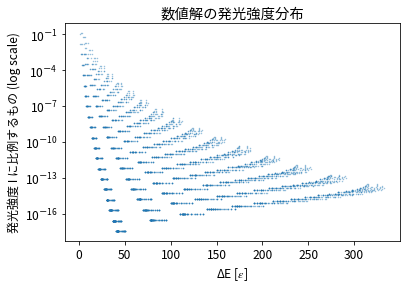

In [ ]:
plt.scatter(dE_lst, I_lst, s=0.2, alpha=0.5)
plt.yscale("log")

plt.title('数値解の発光強度分布')
plt.xlabel(r'ΔE [$\epsilon$]')
plt.ylabel(r'発光強度 I に比例するもの (log scale)')
plt.show()

In [ ]:
from approx_util import *

In [ ]:
scores = Fermi.get_scores(states10)
approx_dE_lst, approx_I_lst = calc_approx_intensities(scores, Te, 1e+20)

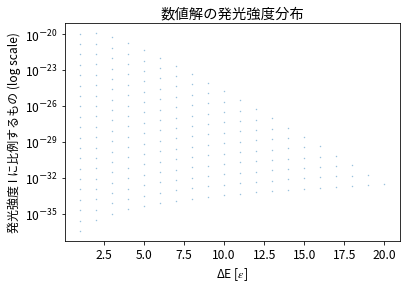

In [ ]:
plt.scatter(approx_dE_lst, approx_I_lst, s=0.2, alpha=0.5)
plt.yscale("log")

plt.title('数値解の発光強度分布')
plt.xlabel(r'ΔE [$\epsilon$]')
plt.ylabel(r'発光強度 I に比例するもの (log scale)')
plt.show()

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def foo(E, eps):
    return eps - (-E**3 + 6 * eps**3 * np.exp(E/eps)) / (3 * E**2 + 6 * eps * E + 6 * eps**2)

In [16]:
foo(500, 100)

-589.6206798337473

In [14]:
np.exp(7)

1096.6331584284585

In [15]:
100**3

1000000

In [22]:
x = 5
print((-x**3 + 6 * np.exp(x))/(3 * x**2 + 6 * x + 6))

6.896206798337474


In [2]:
def func(x):
    return 1 - (-x**3 + 6*np.exp(x))/(3 * (x**2 + 2*x + 2))

In [50]:
xs = np.arange(0, 8, 0.5)
ys = func(xs)

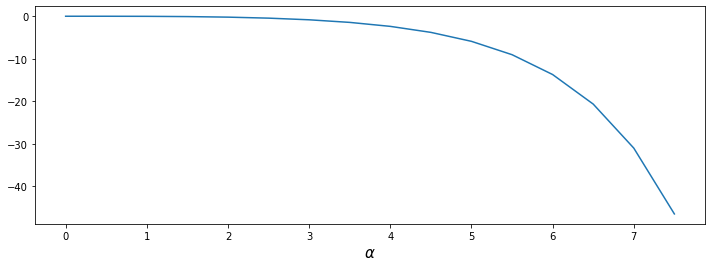

In [51]:
plt.figure(figsize=(12, 4))
plt.plot(xs, ys)
plt.xlabel(r"$\alpha$", fontsize=15)
plt.show()

In [52]:
ys

array([ 0.00000000e+00, -1.77719223e-03, -2.06460647e-02, -8.11556056e-02,
       -2.11144553e-01, -4.45785252e-01, -8.33592579e-01, -1.44419940e+00,
       -2.37934487e+00, -3.78909640e+00, -5.89620680e+00, -9.03296026e+00,
       -1.36971517e+01, -2.06374079e+01, -3.09835844e+01, -4.64465506e+01])

array([ 0.00000000e+00, -1.77719223e-03, -2.06460647e-02, -8.11556056e-02,
       -2.11144553e-01, -4.45785252e-01, -8.33592579e-01, -1.44419940e+00,
       -2.37934487e+00, -3.78909640e+00, -5.89620680e+00, -9.03296026e+00,
       -1.36971517e+01, -2.06374079e+01, -3.09835844e+01, -4.64465506e+01,
       -6.96249916e+01, -1.04477582e+02, -1.57051167e+02, -2.36605950e+02])

In [21]:
from math import factorial
def taylor(x: float, degree: float):
    if degree < 0:
        return None
    elif degree == 0:
        return 1
    return 1 + sum([x**n/factorial(n) for n in range(1, degree+1)])

In [30]:
degree = 3
for x in np.arange(1, 10, 1):
    print(f"exp({x})={np.exp(x)}, taylor(x={x}, degree={degree})={taylor(x, degree)}")

exp(1)=2.718281828459045, taylor(x=1, degree=3)=2.666666666666667
exp(2)=7.38905609893065, taylor(x=2, degree=3)=6.333333333333333
exp(3)=20.085536923187668, taylor(x=3, degree=3)=13.0
exp(4)=54.598150033144236, taylor(x=4, degree=3)=23.666666666666664
exp(5)=148.4131591025766, taylor(x=5, degree=3)=39.33333333333333
exp(6)=403.4287934927351, taylor(x=6, degree=3)=61.0
exp(7)=1096.6331584284585, taylor(x=7, degree=3)=89.66666666666666
exp(8)=2980.9579870417283, taylor(x=8, degree=3)=126.33333333333333
exp(9)=8103.083927575384, taylor(x=9, degree=3)=172.0


In [49]:
for a in range(1, 10, 1):
    print(f"α={a}", a**3 + 3*a**2 + 6*a + 6 - 6 * np.exp(a))
    print(f"α={a}", - 6 * np.exp(a), " (reduction)", end="\n\n")

α=1 -0.30969097075427143
α=1 -16.30969097075427  (reduction)

α=2 -6.334336593583899
α=2 -44.3343365935839  (reduction)

α=3 -42.51322153912601
α=3 -120.51322153912601  (reduction)

α=4 -185.58890019886542
α=4 -327.5889001988654  (reduction)

α=5 -654.4789546154595
α=5 -890.4789546154595  (reduction)

α=6 -2054.5727609564105
α=6 -2420.5727609564105  (reduction)

α=7 -6041.798950570751
α=7 -6579.798950570751  (reduction)

α=8 -17127.747922250368
α=8 -17885.747922250368  (reduction)

α=9 -47586.50356545231
α=9 -48618.50356545231  (reduction)

